In [83]:
import json
import numpy as np
import matplotlib.pyplot as plt
from components_ import scene_creator, processor_creator
from lyd import utils, processing, metrics
from scipy.io import wavfile
from lyd import wdrc
import os

import markdown


In [120]:
# Initialize objects
stimuli = scene_creator(2)
pL = processor_creator(fs=16e3)
pF = processor_creator(fs=16e3)
pS = processor_creator(fs=16e3)
pA = processor_creator(fs=16e3)


# Level adjuster
level_adjuster = processing.AdjustLevel(-30)

# Stimuli parameters
stimuli.update_param('signal_level',65)
stimuli.update_param('noise_type','Stationary')

# Initialize processes
pL.update_param('thr',100)
pL.update_param('ratio',1)
pL.update_param('wdrc','Slow Acting')

pF.update_param('thr',45)
pF.update_param('ratio',3)
pF.update_param('wdrc','Fast Acting')

pS.update_param('thr',45)
pS.update_param('ratio',3)
pS.update_param('wdrc','Slow Acting')

pA.update_param('thr',45)
pA.update_param('ratio',3)
pA.update_param('wdrc','Aware')

f_wdrc = wdrc.WDRC(atk=5e-3,rel=50e-3,thr=45,ratio=3,fs=16e3)
b_wdrc = wdrc.WDRC(atk=5e-3,rel=2000e-3,thr=45,ratio=3,fs=16e3)

# Create dictionaries to iterate through
wdrc_dict = {
    'lin':pL,
    'fast':pF,
    'slow':pS,
    'aware':pA,
    'ideal':'ideal'
}
rooms = {
    'Anechoic' : 'Anechoic',
    'Reverberant' : 'D'
}
snrs = {
    'inf' : 300,
    'high' : 16,
    'medium' : 6,
    'low' : 0
}
nrs = {
    'nr_off' : "None",
    'nr_on' : "Moderate"
}

noise_types = {
    'Stationary' : 'Stationary',
    'Modulated' : 'Modulated'
}

df = pd.DataFrame()

# Iterate over conditions
for noise_key, noise_val in noise_types.items():
    stimuli.update_param('noise_type',noise_val)

    for nr_key, nr_val in nrs.items():
        pL.update_param('nr',nr_val)
        pF.update_param('nr',nr_val)
        pS.update_param('nr',nr_val)
        pA.update_param('nr',nr_val)

        # Iterate over rooms
        for room_key, room_val in rooms.items():
            stimuli.update_param('room',room_val)
            
            # Iterate over snr
            for snr_key, snr_val in snrs.items():
                stimuli.update_param('snr',snr_val)
                
                # Generate stimuli
                stimuli.gen_scene()
                f,b,mix = stimuli.stim.transform()


                # Iterate over compressors
                for wdrc_key, wdrc_val in wdrc_dict.items():

                    if wdrc_key != 'ideal':
                        wdrc_val.gen_sys()
                        s = wdrc_val.s
                        
                        # Process signal
                        xc = s.transform(mix,b)
                        fc = s.shadow_filter(f)
                        bc = s.shadow_filter(b)


                    else:
                        fc = f_wdrc.transform(f)
                        bc = b_wdrc.transform(b)
                        if nr_key != 'None':
                            bc *= utils.from_dB(-12)
                        xc = fc+bc

                    # Calculate ECR, SNR
                    snr_ = metrics.SNR()(fc,bc)
                    ecr_ = metrics.DynamicRange()(f,fc)
                    d = {
                        'wdrc' : wdrc_key,
                        'nr' : nr_key,
                        'in_room' : room_key,
                        'in_snr' : snr_key,
                        'in_noisetype' : noise_key,
                        'snr' : snr_,
                        'ecr' : ecr_,

                    }

                    df = df.append(d,ignore_index=True)


100.0
45.0
45.0
45.0


/Users/nielsoverby/Documents/PhD/github/Lyd/src/lyd/wdrc.py:159: RuntimeWarning: divide by zero encountered in log10
  self.IRM = 20*np.log10(Tfb/(Bfb+1e-99))


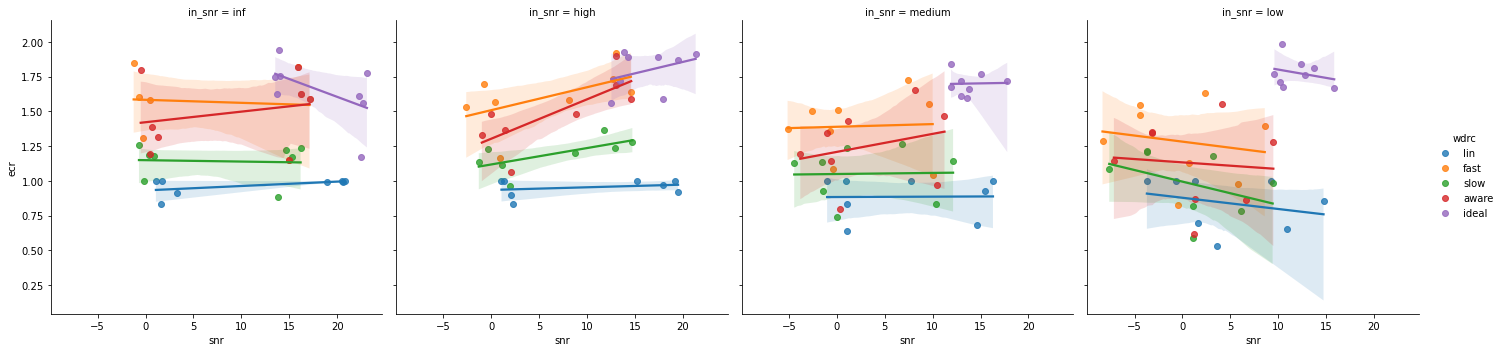

In [126]:
sns.lmplot(data=df,x='snr',y='ecr',hue='wdrc',col='in_snr')

In [88]:
df = pd.DataFrame({
    'minutes' : np.arange(10),
    'X1' : 3*np.random.randn(10),
    'X2' : 4*np.random.randn(10)+2
})

In [115]:
df = pd.DataFrame()


df.append(d,ignore_index=True)

,wdrc,snr,ecr
0,ideal,11.772228,1.570053


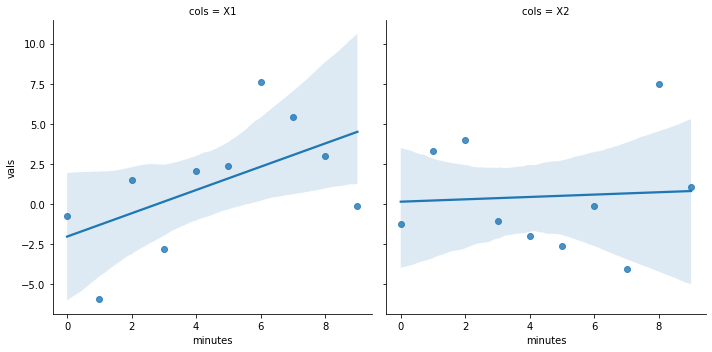

In [111]:
dfm = df.melt('minutes', var_name='cols', value_name='vals')
sns.lmplot(data=dfm,x='minutes',y='vals',hue='cols') # Single plot



In [89]:
import matplotlib.pyplot as plt

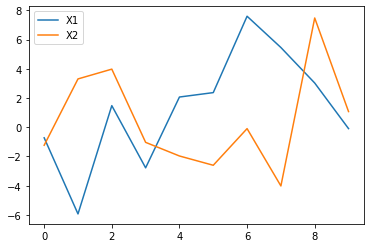

In [98]:
xcol = 'minutes'
ycols = df.columns[df.columns != xcol]

for ycol in ycols:
    plt.plot(df[xcol],df[ycol],label=ycol)
plt.legend()
plt.show()


array([False,  True,  True])

12.057238607297986

In [50]:
df['minutes'] = np.arange(len(df))

In [49]:
len(df)

3

In [51]:
import time

In [54]:
q = time.strptime("14:03:51","%H:%M:%S")

In [ ]:
q.